<a href="https://colab.research.google.com/github/kitagawaowo/Colabs/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fuerza bruta
Sistematicamente en todo el espacio de busqueda, no se busca minimizar el numero de operaciones

Si el orden si importa es una permutacion
<center>

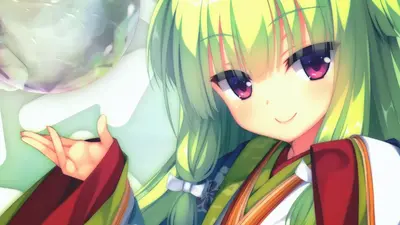



In [83]:
#@title Trabajo con listas
#Lista sencilla
A = [i + 1 for i in range(15)]
print(A)

B = [i for i in range(0, 20, 3)]
print(B)


# Listas con numeros aleatorios
import random as r

# Aleatorios enteros
C = [r.randint(9, 19) for _ in range(10)]
print(C)

# Aleatorios decimales
D = [round(r.uniform(0.4, 3.9), 2) for _ in range(10)]
print(D)

#Insertar un numero entero al final de la lista

C.append(24)
print(C)

#Insertar un numero decimal al final de la lista
D.append(0.88815)
print(D)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 3, 6, 9, 12, 15, 18]
[12, 17, 9, 10, 12, 15, 15, 16, 13, 13]
[1.53, 0.91, 1.13, 3.57, 0.72, 2.97, 0.69, 0.55, 2.34, 2.09]
[12, 17, 9, 10, 12, 15, 15, 16, 13, 13, 24]
[1.53, 0.91, 1.13, 3.57, 0.72, 2.97, 0.69, 0.55, 2.34, 2.09, 0.88815]


## Ordenamientos n^2
<center>

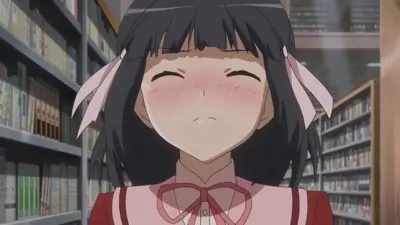




In [84]:
#@title Selection Sort
def selectionSort(arr):
    n = len(arr)
    for i in range(n - 1):
        minPos = i
        for j in range(i + 1, n):
            if arr[j] < arr[minPos]:
                minPos = j
        if i != minPos:
            arr[minPos], arr[i] = arr[i], arr[minPos]
    print(arr)

selectionSort(D)



[0.55, 0.69, 0.72, 0.88815, 0.91, 1.13, 1.53, 2.09, 2.34, 2.97, 3.57]


In [85]:
#@title Bubble Sort

def bubbleSort(arr):
    for i in range(0, len(arr) - 1):
        for j in range(i, len(arr) - 1):
            if (arr[j] > arr[j + 1]):
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    print(arr)

bubbleSort(B)

[0, 3, 6, 9, 12, 15, 18]
